In [95]:
# pip install scikit-learn --break-system-packages

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from datetime import datetime # MOK

print('?68? paskaita. Tema: mašininis mokymas. Pasiruošta ',datetime.now())

?68? paskaita. Tema: mašininis mokymas. Pasiruošta  2024-12-16 21:43:28.296791


In [99]:
ins=pd.read_csv('/home/administratorius/git/python_kursai/gautiDuomenys/insurance.csv')
# /home/administratorius/git/python_kursai/gautiDuomenys/insurance.csv
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

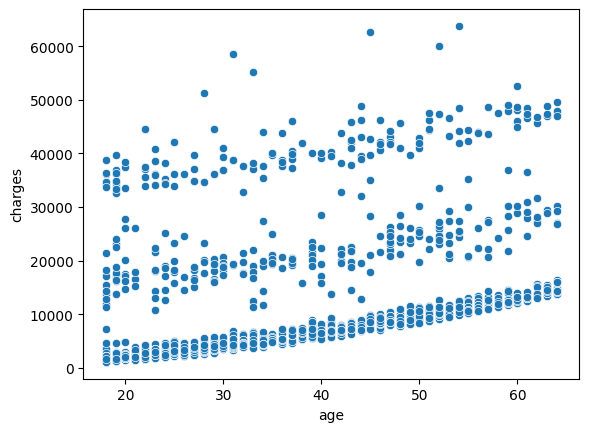

In [100]:
sns.scatterplot(data=ins,x='age',y='charges')

In [ ]:
##################################################################

In [126]:
ins.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [127]:
x=ins[['age','bmi','children']].values
y=ins['charges'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=70)

In [128]:
fit=LinearRegression().fit(x_train,y_train)
predicted=fit.predict(x_test)
print(f"Tikslumas: {fit.score(x_test,y_test)*100:.0f}%")

Tikslumas: 11%


In [129]:
spėjimai=pd.Series(data=predicted,name='Spėjimai')
orig_rez=pd.Series(data=y_test,name='Testas')
# xTest_DF=pd.Series(data=y_test,name='Testas')

In [133]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
##################################################################

In [134]:
x=ins[['age','bmi','children']]
y=ins['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=25)
fit=LinearRegression().fit(x_train,y_train)
predicted=fit.predict(x_test)
spėjimaiDF=pd.Series(data=predicted,name='Spėjimai')
rez=pd.concat([y_test.reset_index(drop=True),spėjimaiDF],axis=1)
rez.head()

,charges,Spėjimai
0,8556.90700,16287.766460
1,7173.35995,11633.538119
2,10579.71100,18770.005892
3,19594.80965,10865.237077
4,22218.11490,13394.392759


<Axes: >

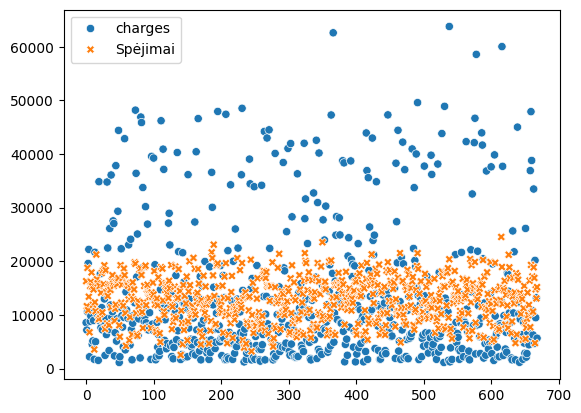

In [135]:
sns.scatterplot(data=rez)

In [ ]:
##################################################################

In [137]:
sex = pd.get_dummies(ins['sex'], dtype=int) # , dtype=int
smoker = pd.get_dummies(ins['smoker'], dtype=int, prefix='smoker')


ins['sex_code']    = pd.Categorical(ins['sex']).codes
ins['smoker_code'] = pd.Categorical(ins['smoker']).codes
ins['region_code'] = pd.Categorical(ins['region']).codes

ins3=pd.concat([ins,sex,smoker],axis=1)
ins.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [139]:
x=ins3.drop(columns=['sex','smoker','region','charges'])
y=ins3['charges']
x.head(3)

,age,bmi,children,sex_code,smoker_code,region_code,female,male,smoker_no,smoker_yes
0,19,27.90,0,0,1,3,1,0,0,1
1,18,33.77,1,1,0,2,0,1,1,0
2,28,33.00,3,1,0,2,0,1,1,0


In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=25)
fit=LinearRegression().fit(x_train,y_train)
predicted=fit.predict(x_test)
print(f"Tikslumas: {fit.score(x_test,y_test)*100:.0f}%")

Tikslumas: 76%


In [51]:
# print('x_train'); print(x_train.head(3))
# print('x_test'); print(x_test.head(3))
# print('y_train'); print(y_train.head(3))
# print('y_test'); print(y_test.head(3))

In [141]:
spėjimaiDF=pd.Series(data=predicted,name='Spėjimai')
rez=pd.concat([y_test.reset_index(drop=True),spėjimaiDF],axis=1)
rez.head()

,charges,Spėjimai
0,8556.90700,11019.569588
1,7173.35995,8032.346505
2,10579.71100,14115.584813
3,19594.80965,30273.556958
4,22218.11490,32766.365973


<Axes: >

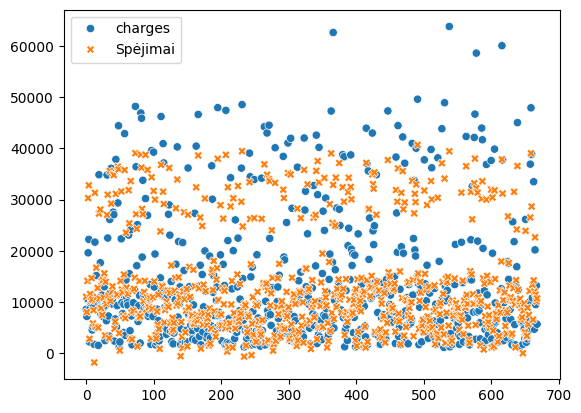

In [142]:
sns.scatterplot(data=rez)

In [143]:
##################################################################
##################################################################

In [82]:
mpg=sns.load_dataset('mpg') #; mpg.head()
# mpg.info()

In [144]:
# Paliekame tik eilutes, kuriose visi nurodyti stulpeliai turi reikšmes
columns_to_check = ['mpg', 'displacement', 'horsepower', 'weight', 'model_year']
autos = mpg.dropna(subset=columns_to_check) # ,inplace=True
# mpg.to_csv('sns_mpg.csv')

In [145]:
# Į metrinę sistemą

# Konversijos faktoriai
mpg_to_l_per_100km = 235.215  # 1 mpg = 235.215 / mpg l/100km
pounds_to_kg = 0.453592  # 1 svaras = 0.453592 kg
cubic_inches_to_liters = 0.0163871  # 1 kubinis colis = 0.0163871 litro

# Sukuriame naujus stulpelius su perskaičiuotais duomenimis
autos['l_per_100km'] = mpg_to_l_per_100km / autos['mpg']  # Kuro sąnaudos (l/100km)
autos['weight_kg'] = autos['weight'] * pounds_to_kg       # Svoris (kg)
autos['displacement_l'] = autos['displacement'] * cubic_inches_to_liters  # Variklio tūris (l)

autos['origin_code'] = pd.Categorical(autos['origin']).codes

# Pašaliname senus stulpelius, jei jie nebėra reikalingi
# autos.drop(columns=['mpg', 'weight', 'displacement'], inplace=True)

# Peržiūrime atnaujintą lentelę
print(autos.head(3))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   

   model_year origin                       name  l_per_100km    weight_kg  \
0          70    usa  chevrolet chevelle malibu      13.0675  1589.386368   
1          70    usa          buick skylark 320      15.6810  1675.115256   
2          70    usa         plymouth satellite      13.0675  1558.542112   

   displacement_l  origin_code  
0        5.030840            2  
1        5.735485            2  
2        5.211098            2  


In [146]:
x_auto=autos[['displacement','horsepower','weight','acceleration','model_year','weight_kg','origin_code']]

y_mpg=autos['mpg']
y_ltr=autos['l_per_100km']

In [147]:
x_auto.head(3)

,displacement,horsepower,weight,acceleration,model_year,weight_kg,origin_code
0,307.0,130.0,3504,12.0,70,1589.386368,2
1,350.0,165.0,3693,11.5,70,1675.115256,2
2,318.0,150.0,3436,11.0,70,1558.542112,2


In [148]:
x_train,x_test,y_train,y_test=train_test_split(x_auto,y_ltr,test_size=0.5,random_state=11)
fit=LinearRegression().fit(x_train,y_train)
predicted=fit.predict(x_test)
print(f"Tikslumas: {fit.score(x_test,y_test)*100:.0f}%")

Tikslumas: 87%


In [ ]:
def predict_mpg():
    print("Įveskite reikšmes prognozei:")
    displacement = float(input("displacement (litrais): "))
    horsepower = float(input("horsepower (AG): "))
    weight = float(input("weight (svarais): "))
    acceleration = float(input("acceleration (sekundės): "))
    model_year = int(input("model_year (metai): "))
    weight_kg = weight * 0.453592  # Automatiškai perskaičiuojame į kg
    
    # Sukuriame įvestų reikšmių lentelę
    input_data = pd.DataFrame([{
        'displacement': displacement,
        'horsepower': horsepower,
        'weight': weight,
        'acceleration': acceleration,
        'model_year': model_year,
        'weight_kg': weight_kg
    }])
    
    # Prognozė
    prediction = fit.predict(input_data)
    print(f"Prognozuojamas MPG (mylės per galoną): {prediction[0]:.2f}")

predict_mpg()

In [151]:
spėjimaiDF=pd.Series(data=predicted,name='Spėjimai')
rez=pd.concat([y_test.reset_index(drop=True),spėjimaiDF],axis=1)
rez.head(3)

,l_per_100km,Spėjimai
0,7.711967,7.779437
1,7.350469,8.171329
2,6.533750,7.287535


<Axes: >

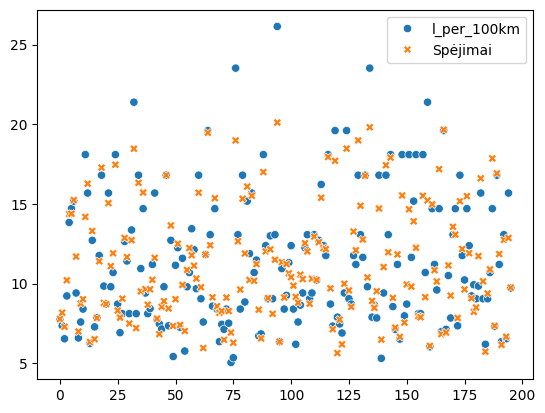

In [154]:
sns.scatterplot(data=rez)

In [153]:
##################################################################

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# `autos` - pradinė duomenų lentelė

# 1. Pasirenkame stulpelius prognozavimui
features = ['displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'weight_kg']
target = 'mpg'  # Prognozavimo tikslas (mylios per galoną)

# Patikriname, kad nėra trūkstamų reikšmių
autos = autos.dropna(subset=features + [target])

# Apskaičiuojame vidurkius
feature_means = autos[features].mean()

# 2. Padalijame duomenis į mokymo ir testavimo rinkinius
X = autos[features]
y = autos[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=70)

# 3. Sukuriame ir apmokome modelį
fit = LinearRegression()
fit.fit(X_train, y_train)

# 4. Prognozės funkcija pagal vartotojo įvestis su vidurkiais
def predict_mpg():
    print("Įveskite reikšmes prognozei (vidutinės reikšmės pateiktos skliaustuose):")
    displacement = float(input(f"displacement (litrais, vidurkis {feature_means['displacement']:.2f}): "))
    horsepower = float(input(f"horsepower (AG, vidurkis {feature_means['horsepower']:.2f}): "))
    weight = float(input(f"weight (svarais, vidurkis {feature_means['weight']:.2f}): "))
    acceleration = float(input(f"acceleration (sekundės, vidurkis {feature_means['acceleration']:.2f}): "))
    model_year = int(input(f"model_year (metai, vidurkis {feature_means['model_year']:.0f}): "))
    weight_kg = weight * 0.453592  # Automatiškai perskaičiuojame į kg
    
    # Sukuriame įvestų reikšmių lentelę
    input_data = pd.DataFrame([{
        'displacement': displacement,
        'horsepower': horsepower,
        'weight': weight,
        'acceleration': acceleration,
        'model_year': model_year,
        'weight_kg': weight_kg
    }])
    
    # Prognozė
    prediction = fit.predict(input_data)
    print(f"Prognozuojamas MPG (mylės per galoną): {prediction[0]:.2f}")

# 5. Išbandome modelį ir įvestį
print("Modelis paruoštas prognozei!")
predict_mpg()

# 6. Tikriname modelio tikslumą
y_pred = fit.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Modelio vidutinė kvadratinė klaida (MSE): {mse:.2f}")


Modelis paruoštas prognozei!
Įveskite reikšmes prognozei (rekomenduojamos vidutinės reikšmės pateiktos skliaustuose):
Prognozuojamas MPG (mylės per galoną): 24.74
Modelio vidutinė kvadratinė klaida (MSE): 10.58
